# Install Dependencies and Setup

In [1]:
import tensorflow as tf
import os

# Remove unwanted data

In [3]:
import cv2
import imghdr

In [4]:
data_dir = 'data'

In [5]:
os.listdir(data_dir)

['happy', 'sad']

In [6]:
image_exts = ['jpeg', 'jpg', 'png', 'bmp']

In [7]:
for image_class in os.listdir(data_dir):
    print(image_class)

happy
sad


In [8]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)

        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)

            if tip not in image_exts:
                print("Image not in ext list {}".format(image_path))
                os.remove(image_path)
        
        except Exception as e:
            print('Issue with image {}'.format(image_path))

# Load the data

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 171 files belonging to 2 classes.


In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()

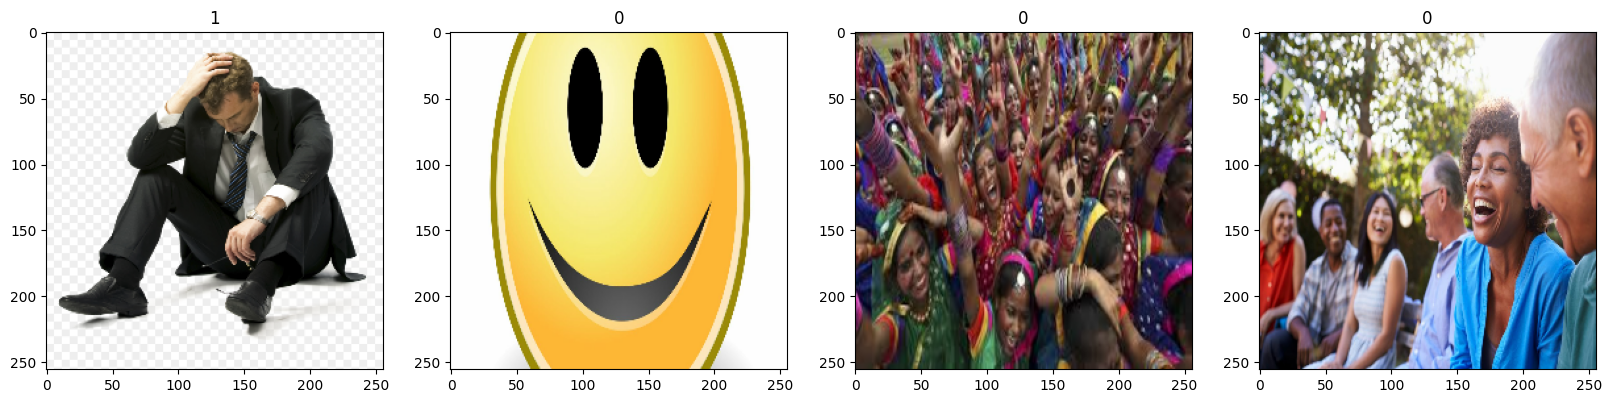

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scale the data

In [14]:
data = data.map(lambda x, y: (x/255, y))

In [15]:
data.as_numpy_iterator().next()

(array([[[[0.1807239 , 0.12582193, 0.3179788 ],
          [0.19548148, 0.13273638, 0.32489324],
          [0.19607843, 0.13333334, 0.3254902 ],
          ...,
          [0.49723834, 0.30900306, 0.47370893],
          [0.49728814, 0.303631  , 0.47843137],
          [0.47679707, 0.31344974, 0.46179008]],
 
         [[0.18140319, 0.12659217, 0.31870356],
          [0.18828268, 0.13338073, 0.3255376 ],
          [0.20006128, 0.13731618, 0.32947305],
          ...,
          [0.457532  , 0.29307118, 0.44999522],
          [0.46648285, 0.29997224, 0.46760255],
          [0.43393123, 0.28705624, 0.43120453]],
 
         [[0.17822123, 0.12986702, 0.31875   ],
          [0.18650669, 0.13160472, 0.32376158],
          [0.20110294, 0.13835785, 0.3305147 ],
          ...,
          [0.4197792 , 0.28529987, 0.4414795 ],
          [0.38136777, 0.2615148 , 0.4130467 ],
          [0.38697487, 0.25848222, 0.4032169 ]],
 
         ...,
 
         [[0.03036152, 0.02643995, 0.0578125 ],
          [0.03137

# Split the data

In [16]:
# calcluate

len(data)

6

In [17]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1) + 1

In [18]:
train_size + val_size + test_size

6

In [19]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [20]:
print(
    len(train),
    len(test),
    len(val),
)

4 1 1


# Build Deep Learning Model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [22]:
model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)))  
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


c:\Users\Phani\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# Train the model

In [25]:
logdir = 'logs'

In [26]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [27]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 710ms/step - accuracy: 0.5375 - loss: 0.8911 - val_accuracy: 0.3750 - val_loss: 0.7363
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 731ms/step - accuracy: 0.4760 - loss: 0.6854 - val_accuracy: 0.5312 - val_loss: 0.7652
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 722ms/step - accuracy: 0.6281 - loss: 0.6747 - val_accuracy: 0.8125 - val_loss: 0.6209
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 830ms/step - accuracy: 0.7042 - loss: 0.6110 - val_accuracy: 0.5938 - val_loss: 0.5681
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 754ms/step - accuracy: 0.6812 - loss: 0.5368 - val_accuracy: 0.7500 - val_loss: 0.4629
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 750ms/step - accuracy: 0.7667 - loss: 0.4686 - val_accuracy: 0.7812 - val_loss: 0.4896
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 768ms/step - accuracy: 0.8365 - loss: 0.4320 - val_accuracy: 0.7500 - val_loss: 0.3717
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 769ms/step - accuracy: 0.8198 - loss: 0.3434 - val_accuracy: 0.9688 - val_loss:

# Plot model performance

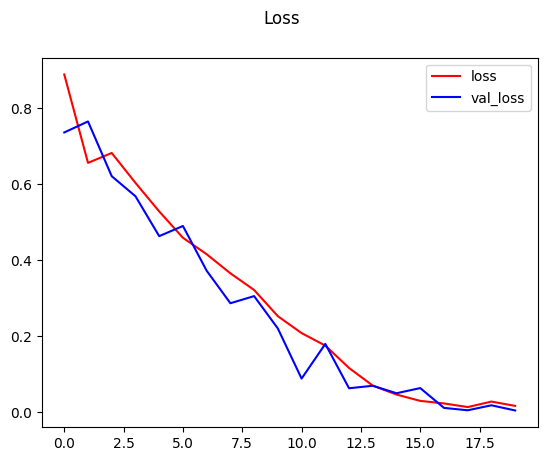

In [28]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'red', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'blue', label = 'val_loss')
fig.suptitle('Loss')
plt.legend()
plt.show()

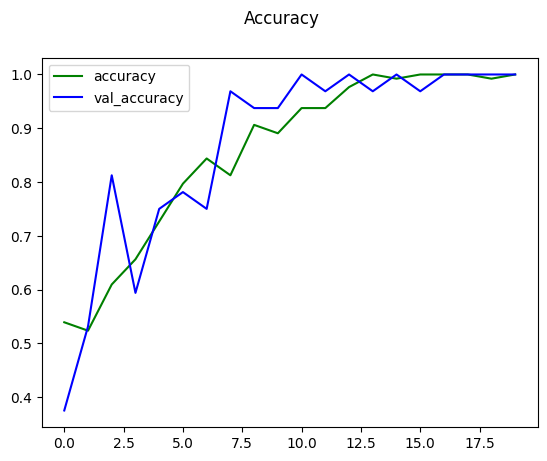

In [29]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'green', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'blue', label = 'val_accuracy')
fig.suptitle('Accuracy')
plt.legend()
plt.show()

# Evaluate the model

In [30]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [31]:
precision = Precision()
recall = Recall()
acc = BinaryAccuracy()

In [32]:
for batch in test.as_numpy_iterator():
    x, y = batch
    yhat = model.predict(x)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


In [33]:
print(precision.result())
print(recall.result())
print(acc.result())

tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


# Testing the model

In [34]:
import cv2

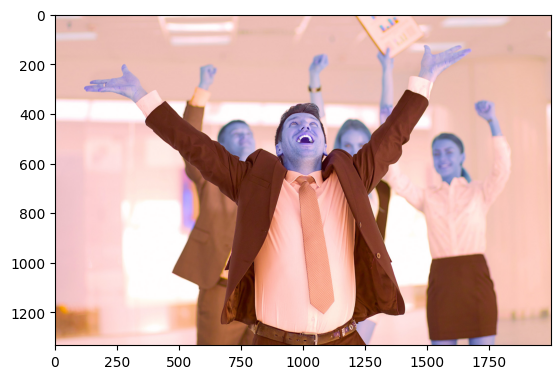

In [35]:
img = cv2.imread('data/happy/170404-happy-workers-feature.jpg')
plt.imshow(img)
plt.show()

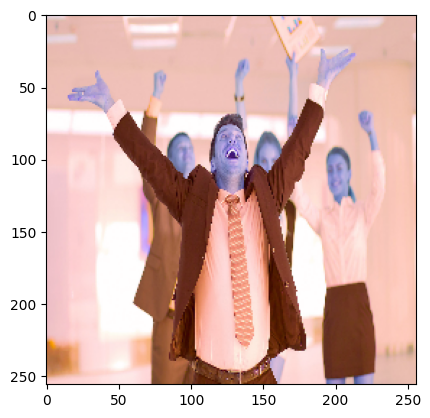

In [36]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [37]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


In [38]:
yhat

array([[5.6128574e-05]], dtype=float32)

In [39]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# Save the Model

In [40]:
from tensorflow.keras.models import load_model

In [41]:
# .h5 format for older keras version
model.save(os.path.join('model', 'img_classifier.h5'))

In [42]:
# for new standard version
model.save(os.path.join('model', 'img_classifier.keras'))  